In [1]:
import ggcas as gc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Initialized with Gaia table: 'gaiadr3.gaia_source'

GAIA - GLOBULAR CLUSTERS ANALYSIS SOFTWARE
            ..............
         ..:;;..:;;;;;:::::;;
       ;;;;;;::.::;;;;;;;;;;;;;
      ;;;;.:;;;..;XXXXXX.::....:
     :;::;::..+XXXXXXXXX+:;;;;;;:
    ;::;:.:;;:XXXXXXXXXXX::::::::;        __ _  __ _(_) __ _
    .;;..;;;:.:XXXXXXXXX$$$$$$$$$$X.     / _` |/ _` | |/ _` |
    :;..:;;;..:xXXXXXXX$$$$$$$$$$$$X    | (_| | (_| | | (_| |
    :;:.:;;.XXXXXXXXX$$$$$$$$$$$$$$;     \__, |\__,_|_|\__,_|
    .;;:.:X$$$$$$$$$$$$$$$$$$$$$$X.      |___/
    ..:;:$$$$$$$$$$$$$$$$$$$$$$X;.
     :;;;$$$$$$$$$$$$$$$$$$$$::;;
      ...;$$$$$$$$$$$$$$x;:;;;;;
        ......:;:....;;;;;;;:.
         ::::::::::;;;::...

             INITIALIZED




In [2]:
ngc6121 = gc.dr3.get_astrometry(0.1, gc='ngc6121')
ngc6121.to_pandas(overwrite=True, index='SOURCE_ID')
ngc6121.sample.dropna(inplace=True)
ngc6121.sample.head()

INFO: Query finished. [astroquery.utils.tap.core]
Sample number of sources: 20062


,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error
SOURCE_ID,,,,,,,,,,
6045465540585768320,245.958622,1.311131,-26.515028,0.863623,0.136671,1.411395,-12.283603,2.071098,-17.439522,1.850242
6045465540583888640,245.961411,0.432379,-26.506407,0.222562,-0.204317,0.450473,-10.937037,0.690123,-18.823906,0.413798
6045465540583888768,245.961538,0.272752,-26.506683,0.158406,0.807585,0.286590,-12.075080,0.428756,-19.860777,0.289603
6045465540585358720,245.962585,0.161342,-26.525861,0.096194,0.597685,0.178331,-12.631369,0.241221,-18.622572,0.167933
6045465540585364736,245.959195,0.221089,-26.522479,0.143999,0.256526,0.234203,-11.599773,0.323069,-18.961183,0.251987


findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


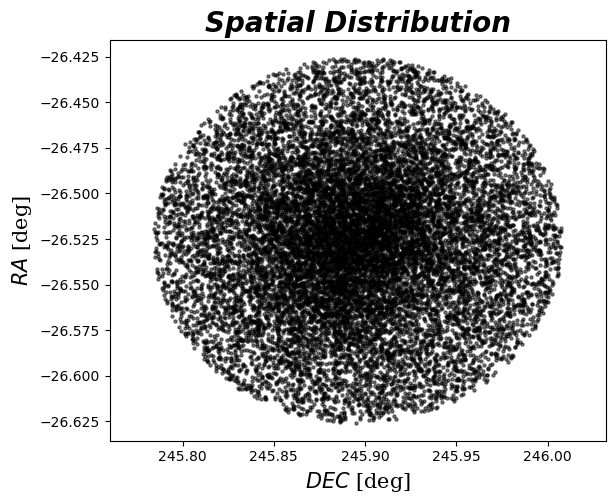

In [3]:
h = gc.plots.spatial(ngc6121)